# Hands-on Lab --- Calculating and Analyzing CLV

## Importing standard packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

## Reading in the original data, and joining with the churn and margin predicted values:

In [2]:
combined_df = pd.read_csv(r'C:\Users\Ashish\OneDrive - Oklahoma A and M System\CLV\Output Datasets\combined_data.csv')
churn_df = pd.read_csv(r'C:\Users\Ashish\OneDrive - Oklahoma A and M System\CLV\Output Datasets\churn_scores.csv')
margin_df = pd.read_csv(r'C:\Users\Ashish\OneDrive - Oklahoma A and M System\CLV\Output Datasets\margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

# it should be noted that Python is case sensitive for variable names.  acct_id above would fail.

combined_df.shape

C:\Users\Ashish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(246560, 139)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

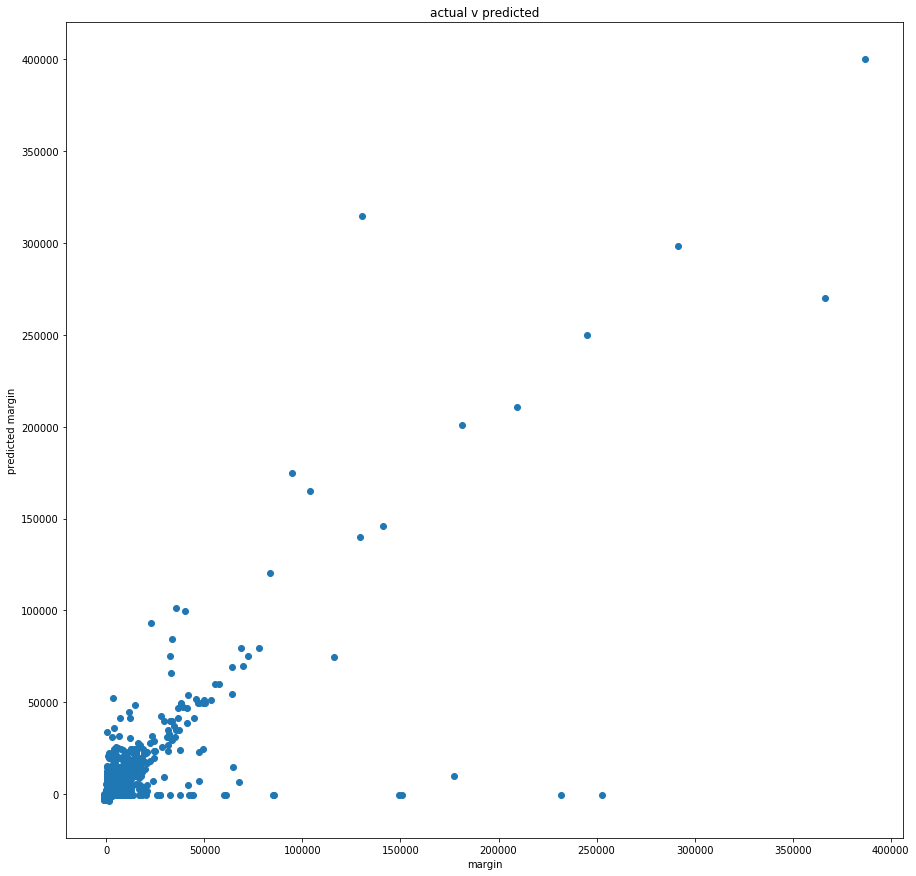

In [3]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000

# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

# It should be noted:  we are scoring our original data, used for modeling, only for the purposes of analysis.
##  In a "real world" situation, we would most likely be scoring a full population for which we did not actually
##  know the future churn or the future margin.

## We are using a simplified CLV formula, in which we:
###    *  are predicting only annual numbers,
###    *  are assuming that next year's annual prediction are the same values for the next 3 years,
###    *  that our future value is adequately estimated using only 3 future years.

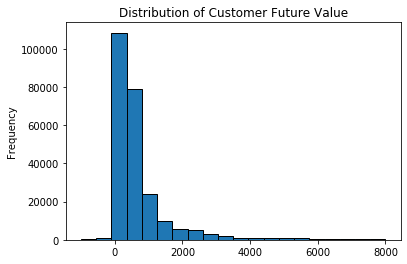

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,log_purch_cnt_life,log_purch_cnt_tt_36mo,log_resp_cnt_36mo,perc_purch_cc_36mo,perc_purch_ck_36mo,perc_purch_et_36mo,margin_Y_neg_1,margin_Y_neg_2,margin_Y_neg_3,...,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,demog_LOR_00 to 05 years,demog_LOR_06 to 10 years,demog_LOR_11 to 19 years,demog_LOR_20+ years,demog_ownrent_Definite Owner,demog_ownrent_Definite Renter,demog_ownrent_Probable Owner,demog_ownrent_Probable Renter,demog_age_18-24 years old,demog_age_25-34 years old,demog_age_35-44 years old,demog_age_45-54 years old,demog_age_55-64 years old,demog_age_65-74 years old,demog_age_75+ years old,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,...,246560.00,246560.00,246560.00,246560.00,2.47e+05,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,246560.00,2.47e+05,246560.00,246560.00,246560.0,246560.00,246560.00,246560.00,2.47e+05,2.47e+05,246560.00,246560.00
mean,0.51,0.89,0.96,0.09,0.26,2.92,64.34,4.99,18.84,7.63,2.25,0.26,0.73,2.59,2.85,1.54,1.39,1.13,0.32,0.31,0.56,0.13,220.51,186.54,162.22,...,0.21,0.06,0.03,0.01,6.12e-03,0.68,0.27,0.21,0.22,0.25,0.64,0.02,0.02,0.02,5.47e-03,0.06,0.15,0.2,0.22,0.18,0.13,2.65e-01,4.70e+00,418.47,791.27
std,0.50,0.31,0.19,0.29,0.44,3.11,57.99,10.17,14.75,46.84,2.35,0.44,0.29,0.65,0.80,0.35,0.61,0.43,0.45,0.44,0.47,0.32,1516.02,1898.46,2103.33,...,0.41,0.24,0.18,0.10,7.80e-02,0.47,0.44,0.41,0.42,0.43,0.48,0.15,0.13,0.15,7.38e-02,0.23,0.35,0.4,0.42,0.38,0.34,3.19e-01,9.33e-03,2071.80,3343.01
min,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,-15084.25,-21224.13,-7515.94,...,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00,0.00,0.00,3.24e-03,4.69e+00,-1199.70,-2419.75
25%,0.00,1.00,1.00,0.00,0.00,1.00,14.00,1.00,5.00,0.00,1.00,0.00,0.60,2.21,2.30,1.32,0.95,0.85,0.00,0.00,0.00,0.00,41.71,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00,0.00,0.00,1.57e-02,4.70e+00,148.09,116.34
50%,1.00,1.00,1.00,0.00,0.00,1.00,44.00,1.22,16.00,0.00,2.00,0.00,0.70,2.70,2.89,1.41,1.41,1.23,0.00,0.00,0.92,0.00,179.70,118.57,24.31,...,0.00,0.00,0.00,0.00,0.00e+00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00,0.00,0.00,9.80e-02,4.70e+00,199.39,386.31
75%,1.00,1.00,1.00,0.00,1.00,4.00,107.00,2.59,33.00,3.00,3.00,1.00,0.90,3.02,3.42,1.67,1.86,1.53,0.60,0.94,1.00,0.00,334.55,289.88,239.93,...,0.00,0.00,0.00,0.00,0.00e+00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00,0.00,0.00,5.22e-01,4.70e+00,384.66,752.91
max,1.00,1.00,1.00,1.00,1.00,12.00,290.00,168.00,424.00,2670.00,38.00,1.00,2.78,6.09,6.74,5.48,3.42,2.68,2.61,2.00,2.00,1.08,284605.19,469878.25,493368.29,...,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.0,1.00,1.00,1.00,9.55e-01,5.64e+00,386843.84,667415.80


In [4]:
annual_discount_rate = 0.10
combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

## Establishing the quadrants for high/low churn and margin

In [5]:
print("median predicted churn: ",  np.median(combined_df['P_churn_year_plus1_ind']))
print("median predicted margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"

combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

combined_df.head(10)

median predicted churn:  0.09803406142249088
median predicted margin: 199


,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,...,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,demog_LOR_00 to 05 years,demog_LOR_06 to 10 years,demog_LOR_11 to 19 years,demog_LOR_20+ years,demog_ownrent_Definite Owner,demog_ownrent_Definite Renter,demog_ownrent_Probable Owner,demog_ownrent_Probable Renter,demog_age_18-24 years old,demog_age_25-34 years old,demog_age_35-44 years old,demog_age_45-54 years old,demog_age_55-64 years old,demog_age_65-74 years old,demog_age_75+ years old,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV,retention_grp,margin_grp,quadrant_retention_margin
0,SC,29607,567,864,1,1,1,0,0,3,21,4.50,5,0,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1,0.30,2.16,2.16,1.48,...,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,6.83e-01,4.7,112.02,44.33,1L,1L,1L_1L
1,MO,63901,632,573,1,1,1,0,0,9,9,36.00,1,1,0,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1,0.30,1.32,1.32,1.32,...,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.60e-01,4.7,97.40,14.19,1L,1L,1L_1L
2,IL,60456,602,missing,0,1,1,0,0,1,167,3.07,17,0,0,1-Bronze,xxx,I27001315,05OCT00,NaN,0,0.70,2.78,3.46,1.56,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.99e-02,4.7,325.70,734.13,2H,2H,2H_2H
3,FL,34698,539,727,1,1,1,0,0,9,13,1.00,5,1,1,3-Gold,xxx,I150064127,31JUL13,29NOV14,1,0.60,2.62,2.62,1.93,...,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9.34e-01,4.7,379.04,24.08,1L,2H,1L_2H
4,CA,92084,825,760,0,1,1,0,0,1,2,1.00,2,0,0,1-Bronze,xxx,I152631565,30JUN14,NaN,0,0.48,2.08,2.08,1.79,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.01e-01,4.7,239.21,485.75,1L,2H,1L_2H
5,MI,48446,505,810,1,0,1,0,0,11,128,1.58,4,0,3,1-Bronze,2-Silver,H62972005,04JAN04,30SEP14,1,0.78,2.49,3.30,1.89,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,6.96e-01,4.7,273.97,102.62,1L,2H,1L_2H
6,AL,35020,630,205,0,1,1,0,0,5,10,1.00,6,0,0,1-Bronze,xxx,I151044258,30OCT13,31MAR15,1,0.30,2.08,2.08,1.32,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,8.76e-01,4.7,153.88,19.46,1L,1L,1L_1L
7,PR,missing,998,missing,0,1,1,0,1,1,121,2.07,30,0,0,1-Bronze,xxx,I95584028,04AUG04,NaN,0,0.48,2.78,3.08,1.32,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.01e-03,4.7,190.80,469.91,2H,1L,2H_1L
8,AZ,85232,753,520,1,1,1,0,1,1,120,19.83,4,0,0,3-Gold,1-Bronze,I106802847,03SEP04,NaN,0,0.48,1.91,2.42,1.32,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,7.63e-03,4.7,140.97,345.42,2H,1L,2H_1L
9,CA,95691,862,916,1,1,1,0,0,12,15,1.00,4,1,2,1-Bronze,xxx,I149698399,31MAY13,30AUG14,1,0.48,1.96,1.96,1.37,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.05e-01,4.7,140.70,13.28,1L,1L,1L_1L


## Output scored data and go to Tableau for more analysis...

In [6]:
combined_df.to_csv(r'C:\Users\Ashish\OneDrive - Oklahoma A and M System\CLV\CLV_scores.csv',index=False)

In [7]:
print("number of accounts, in each quadrant")
print(combined_df.groupby(['margin_grp','retention_grp'])['acct_ID'].count())

print("")

print("percentage of accounts with scheduled purchase, in each quadrant")
print(combined_df.groupby(['margin_grp','retention_grp'])['scheduled_purchase_flg'].mean())

number of accounts, in each quadrant
margin_grp  retention_grp
1L          1L               78366
            2H               44397
2H          1L               44914
            2H               78883
Name: acct_ID, dtype: int64

percentage of accounts with scheduled purchase, in each quadrant
margin_grp  retention_grp
1L          1L               7.58e-03
            2H               6.06e-01
2H          1L               7.35e-03
            2H               4.61e-01
Name: scheduled_purchase_flg, dtype: float64
